## Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

## Đọc dữ liệu từ file

Dữ liệu sau khi cào từ web về được lưu trong file `nang_suat_lao_dong.json`

In [3]:
data = pd.read_json('nang_suat_lao_dong.json')

In [4]:
data

,dataset
dimension,"{'Ngành': {'label': 'Ngành', 'category': {'ind..."
label,Năng suất lao động xã hội phân theo ngành kinh...
source,None
status,{'130': None}
updated,9999-12-31T16:59:59Z
value,"[21.4, 25.3, 32.0, 37.9, 43.9, 55.0, 62.8, 68...."


## Khám phá dữ liệu

Qua bảng trên chúng ta tạm thời chỉ có thể khai thác thông tin duy nhất là nội dung của file dữ liệu này.

In [5]:
data['dataset']['label']

'Năng suất lao động xã hội phân theo ngành kinh tế (*) chia theo Ngành và Năm'

Nhìn bảng dữ liệu trong file vừa cào về từ web có vẻ không đúng như mong muốn của chúng ta lắm, thứ mà ta mong muốn là một bảng chứa thông tin năng suất lao động phân theo nghành và năm. Vì vậy chúng ta cần tiến hành một số bước xử lý nhỏ để có thể khai thác nhiều thông tin hơn.

## Tiền xử lý dữ liệu

Nội dung file dữ liệu của chúng ta là năng suất lao đông theo nghành và năm. Có vẻ như toàn bộ các thông tin về các tên nghành và năm đều nằm trong `dimension`, còn dữ liệu số liệu của chúng ta thì nằm trong `value`. Chúng ta cần lấy ra những thông tin này.

In [6]:
data['dataset']['dimension']

{'Ngành': {'label': 'Ngành',
  'category': {'index': {'0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    '11': 11,
    '12': 12,
    '13': 13,
    '14': 14,
    '15': 15,
    '16': 16,
    '17': 17,
    '18': 18,
    '19': 19,
    '20': 20},
   'label': {'0': 'TỔNG SỐ',
    '1': 'Nông nghiệp, lâm nghiệp và thủy sản',
    '2': 'Khai khoáng',
    '3': 'Công nghiệp chế biến, chế tạo',
    '4': 'Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí',
    '5': 'Cung cấp nước; hoạt động quản lý và xử lý rác thải, nước thải',
    '6': 'Xây dựng',
    '7': 'Bán buôn và bán lẻ; sửa chữa ô tô, mô tô, xe máy và xe có động cơ khác',
    '8': 'Vận tải, kho bãi',
    '9': 'Dịch vụ lưu trú và ăn uống',
    '10': 'Thông tin và truyền thông',
    '11': 'Hoạt động tài chính, ngân hàng và bảo hiểm',
    '12': 'Hoạt động kinh doanh bất động sản',
    '13': 'Hoạt động chuyên môn, khoa học và công ngh

Chúng ta lấy tên nghành rồi lưu vào biến `ten_nghanh`.

In [7]:
ten_nghanh = data['dataset']['dimension']['Ngành']['category']['label'].values()
ten_nghanh

dict_values(['TỔNG SỐ', 'Nông nghiệp, lâm nghiệp và thủy sản', 'Khai khoáng', 'Công nghiệp chế biến, chế tạo', 'Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí', 'Cung cấp nước; hoạt động quản lý và xử lý rác thải, nước thải', 'Xây dựng', 'Bán buôn và bán lẻ; sửa chữa ô tô, mô tô, xe máy và xe có động cơ khác', 'Vận tải, kho bãi', 'Dịch vụ lưu trú và ăn uống', 'Thông tin và truyền thông', 'Hoạt động tài chính, ngân hàng và bảo hiểm', 'Hoạt động kinh doanh bất động sản', 'Hoạt động chuyên môn, khoa học và công nghệ', 'Hoạt động hành chính và dịch vụ hỗ trợ', 'Hoạt động của Đảng Cộng sản, tổ chức chính trị - xã hội; quản lý Nhà nước, an ninh quốc phòng; đảm bảo xã hội bắt buộc', 'Giáo dục và đào tạo', 'Y tế và hoạt động trợ giúp xã hội', 'Nghệ thuật, vui chơi và giải trí', 'Hoạt động dịch vụ khác', 'Hoạt động làm thuê các công việc trong các hộ gia đình, sản xuất sản phẩm, vật chất và dịch vụ tiêu dùng của hộ gia đình'])

Làm tương tự, chúng ta lấy dữ các năm và lưu vào biến `year`

In [8]:
year = data['dataset']['dimension']['Năm']['category']['label'].values()
year

dict_values(['2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Sơ bộ 2020'])

Tiếp theo, chúng ta lấy số liệu rồi lưu vào biến `values`

In [9]:
values = data['dataset']['value']
values = np.array(values).reshape(len(ten_nghanh), len(year))

Cuối cùng là ghép lại thành DataFrame. Dữ liệu của chúng ta là năng suất lao động theo năm và nghành, thế nên sẽ chọn các năm làm tên dòng, tên nghành là tên cột. (Dữ liệu mà ta sử dụng là `data_by_industry`)

In [10]:
data_by_year = pd.DataFrame(values, columns = year)
data_by_year['Tên nghành'] = ten_nghanh
data_by_year = data_by_year.set_index('Tên nghành')

data_by_industry =  pd.DataFrame(values.T, columns = ten_nghanh)
data_by_industry['year'] = year
data_by_industry = data_by_industry.set_index('year')

data_by_year

,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Sơ bộ 2020
Tên nghành,,,,,,,,,,,,,,,
TỔNG SỐ,21.4,25.3,32.0,37.9,43.9,55.0,62.8,68.3,74.3,78.9,84.4,93.2,102.1,110.5,117.4
"Nông nghiệp, lâm nghiệp và thủy sản",7.5,9.7,13.6,14.1,16.6,22.2,25.4,26.2,28.5,30.8,33.1,35.8,39.8,44.7,52.7
Khai khoáng,346.6,373.8,503.1,567.1,733.7,961.9,1269.2,1444.9,1748.1,1747.8,1687.5,1741.6,2054.5,2050.5,2008.2
"Công nghiệp chế biến, chế tạo",34.2,42.7,50.1,51.3,39.6,53.0,60.2,64.9,67.3,67.9,71.0,80.5,88.7,88.2,93.0
"Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí",220.0,312.2,337.7,468.6,495.3,578.3,749.7,870.7,924.9,1134.2,1180.5,1424.9,1500.9,1511.7,1740.3
"Cung cấp nước; hoạt động quản lý và xử lý rác thải, nước thải",37.3,85.3,125.5,84.7,93.6,127.8,141.2,150.3,176.9,176.8,174.4,193.2,192.3,191.1,204.3
Xây dựng,26.9,33.6,38.8,42.5,43.1,48.1,52.9,56.0,62.4,69.5,65.5,70.6,75.7,77.7,83.0
"Bán buôn và bán lẻ; sửa chữa ô tô, mô tô, xe máy và xe có động cơ khác",24.3,31.2,40.9,46.7,30.5,40.3,47.4,51.6,58.9,63.1,69.9,77.9,82.7,92.6,100.7
"Vận tải, kho bãi",21.7,29.1,35.4,38.8,43.1,55.8,62.2,68.0,72.4,69.6,74.7,76.3,84.7,85.1,79.3


## Tiếp tục khám phá dữ liệu

Có vẻ như dữ liệu bây giờ mới chính là thứ mà ta cần, chúng ta tiếp tục khám phá dữ liệu.

### Dữ liệu hiện tại có bao nhiêu dòng, cột?

In [140]:
n_rows = data_by_industry.shape[0]
n_column = data_by_industry.shape[1]
print('Số dòng: ',n_rows)
print('Số cột: ',n_column)

Số dòng:  15
Số cột:  21


### Ý nghĩa của mỗi dòng, cột?

Mỗi cột là một tên nghành khác nhau.

Mỗi dòng thể hiện năng suất lao động của một nghành qua các năm, mỗi dòng 1 năm khác nhau. Cũng dể hiểu khi dữ liệu chỉ có 15 dòng, vì thống kê năng suất lao động của các nghành qua 15 năm đã là rất nhiều rồi, rất khó để có thể có dữ liệu của vài chục hay cả trăm năm.

### Các cột có kiểu dữ liệu gì?

Mỗi cột đều chứa các con số là năng suất lao động của các nghành khác nhau trong năm đó. Tất cả đều có kiểu dữ liệu số.

Theo trên trang web mà nhóm em lấy dữ liệu này vê thì đơn vị tính của mỗi ô dữ liệu là: triệu đồng / người.

In [148]:
data_by_industry.dtypes

TỔNG SỐ                                                                                                                     float64
Nông nghiệp, lâm nghiệp và thủy sản                                                                                         float64
Khai khoáng                                                                                                                 float64
Công nghiệp chế biến, chế tạo                                                                                               float64
Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí                                              float64
Cung cấp nước; hoạt động quản lý và xử lý rác thải, nước thải                                                               float64
Xây dựng                                                                                                                    float64
Bán buôn và bán lẻ; sửa chữa ô tô, mô tô, xe máy và xe có động cơ khác      

### Dữ liệu phân bố như thế nào?

Dữ liệu khá ít, nên có thể nhìn thấy toàn bộ dữ liệu.

Vì toàn bộ dữ liệu đều có kiểu số, không có cột nào dữ liệu kiểu khác. Nên chúng ta dùng hàm `describe` để kiểm tra một số thông tin như max, min, Q1, Q3 để hiểu hơn sự phân bố dữ liệu.

In [151]:
data_by_industry.describe().round(2)

,TỔNG SỐ,"Nông nghiệp, lâm nghiệp và thủy sản",Khai khoáng,"Công nghiệp chế biến, chế tạo","Sản xuất và phân phối điện, khí đốt, nước nóng, hơi nước và điều hòa không khí","Cung cấp nước; hoạt động quản lý và xử lý rác thải, nước thải",Xây dựng,"Bán buôn và bán lẻ; sửa chữa ô tô, mô tô, xe máy và xe có động cơ khác","Vận tải, kho bãi",Dịch vụ lưu trú và ăn uống,Thông tin và truyền thông,"Hoạt động tài chính, ngân hàng và bảo hiểm",Hoạt động kinh doanh bất động sản,"Hoạt động chuyên môn, khoa học và công nghệ",Hoạt động hành chính và dịch vụ hỗ trợ,"Hoạt động của Đảng Cộng sản, tổ chức chính trị - xã hội; quản lý Nhà nước, an ninh quốc phòng; đảm bảo xã hội bắt buộc",Giáo dục và đào tạo,Y tế và hoạt động trợ giúp xã hội,"Nghệ thuật, vui chơi và giải trí",Hoạt động dịch vụ khác,"Hoạt động làm thuê các công việc trong các hộ gia đình, sản xuất sản phẩm, vật chất và dịch vụ tiêu dùng của hộ gia đình"
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,67.16,26.71,1282.57,63.51,896.66,143.65,56.42,57.25,59.75,58.80,91.71,509.93,1259.53,184.60,50.96,59.45,61.25,134.15,87.77,70.22,27.84
std,30.98,13.17,642.09,18.53,496.54,50.16,17.27,23.43,21.02,15.47,18.22,212.14,621.80,63.62,10.44,33.04,34.90,96.18,24.98,29.02,13.49
min,21.40,7.50,346.60,34.20,220.00,37.30,26.90,24.30,21.70,35.60,66.00,84.00,541.00,82.00,32.30,13.70,21.40,35.00,61.60,17.90,7.50
25%,40.90,15.35,650.40,50.70,481.95,109.55,42.80,40.60,40.95,43.20,79.15,443.95,936.00,121.95,41.80,34.85,28.40,54.15,68.80,50.35,15.70
50%,68.30,26.20,1444.90,64.90,870.70,150.30,56.00,51.60,68.00,61.00,85.10,580.10,1196.20,194.10,53.30,55.80,57.90,116.50,76.90,73.80,29.00
75%,88.80,34.45,1747.95,75.75,1302.70,184.00,70.05,73.90,75.50,70.85,101.10,645.90,1306.15,237.35,60.10,76.85,85.55,210.70,103.55,97.40,38.10
max,117.40,52.70,2054.50,93.00,1740.30,204.30,83.00,100.70,85.10,83.80,125.40,742.90,3232.20,263.70,65.10,124.90,126.20,312.30,135.60,102.90,50.30


**Nhận xét:**
- Mỗi cột đều có đủ 15 giá trị, tương ứng với năng suất lao động của nghành trong 15 năm, không có cột nào có bị miss value.
- Đa số dữ liệu trong mỗi cột phân bố đều trong các khoảng. Riêng cột `Hoạt động kinh doanh bất động sản` có giá trị max cao vượt trội so với các giá trị còn lại.
- Giữa các cột khác nhau, đôi khi có sự chênh lệch giá trị rất rất lớn. Chứng tỏ có 1 số nghành có năng suất lao động vượt trội rất rất nhiều so với các nghành khác.

## Câu hỏi: Năng suất lao động của các nghành thay đổi như thế nào qua 15 năm?

Trong quá trình trả lời câu hỏi, có một số chỗ cần vẽ biểu đồ, nên chúng ta cần hàm vẽ biểu đồ. Hơn nữa, có thể có 1 số cột tên khá dài, không thể hiển thị hết được, thế nên cần 1 hàm để định dạng lại. Nếu tên quá dài thì chỉ hiện thì 30 ký tự đầu rồi thêm dấu '...' phía sau.

In [235]:
def format_name(names, max_len = 30):
    result = []
    for name in names:
        if (len(name) > max_len):
            name = name[:max_len] + '...'
        result.append(name)
    return result
        

In [236]:
def draw_bar_chart(x, y, title, xlabel, ylabel):
    plt.barh(format_name(x),y, height = 0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [259]:
def draw_line_chart(x_axis, y_axis, title, xlabel, ylabel, legend):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 45)

    for line in y_axis:
        plt.plot(x_axis,line)
    
    plt.legend(format_name(legend))
    plt.show()

Như nhận xét phía trên, có một số nghành có năng suất lao động vượt trội hơn so với các nghành khác. Để làm rõ hơn điều này, chúng ta cần tính tổng năng suất lao động trong 15 năm, rồi so sánh.

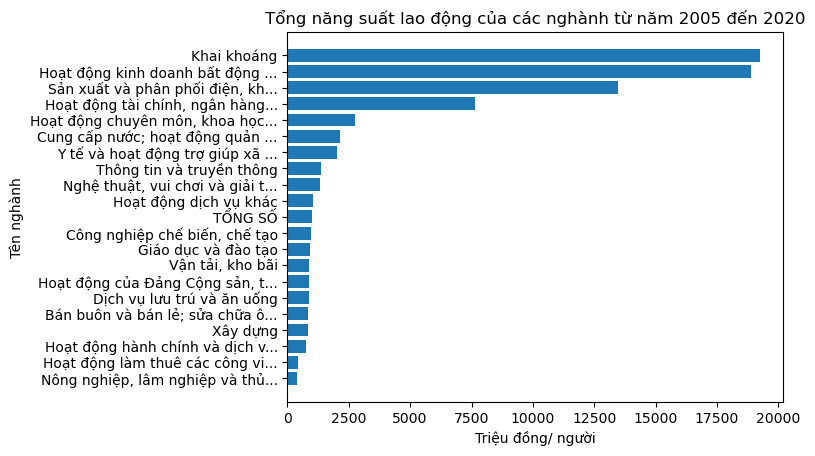

In [238]:
total = data_by_industry.sum()
total = total.sort_values()
draw_bar_chart(total.keys(),total.values,'Tổng năng suất lao động của các nghành từ năm 2005 đến 2020','Triệu đồng/ người','Tên nghành')

Qua biểu đồ trên, ta thấy các nghành khai khoáng, bất động sản, sản xuất phân phối điện và tài chính có sự chệnh lệch vượt trội so với tất cả các nghành còn lại (gấp vài lần đến vài chục lần) nên rất khó để biểu diễn trên một biểu đồ. Chúng ta cần chia ra các nhóm khác nhau để vẽ biểu đồ.

Có thể tạm chia làm 3 nhóm: Nhóm rất cao, nhóm trung binh và nhóm thấp (Do quá nhiều nghành khác nhau nên mỗi nhóm chỉ lấy đại diện 4 - 5 nghành để biểu diễn)

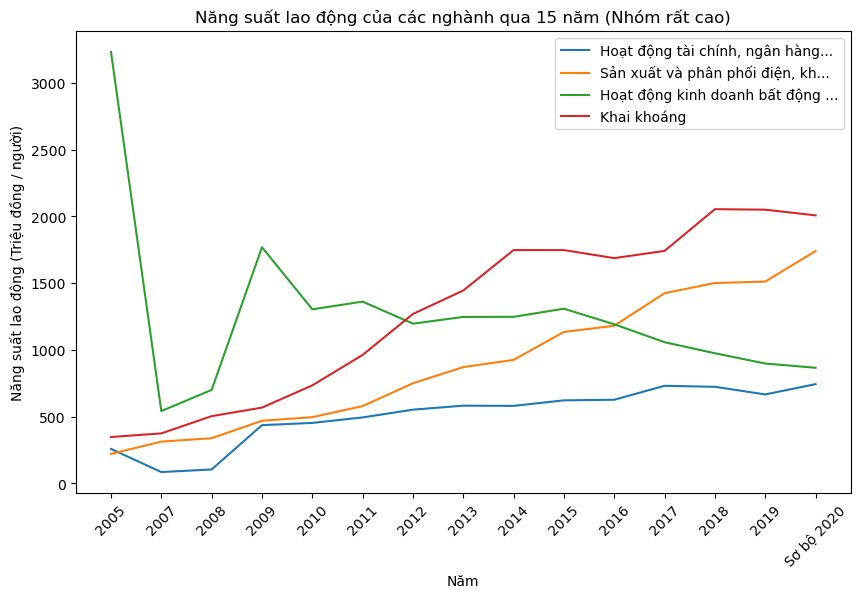

In [280]:
rat_cao = total[-4:].keys()
y_axis = data_by_industry[rat_cao].values.T
x_axis = year

xlabel = 'Năm'
ylabel = 'Năng suất lao động (Triệu đồng / người)'
title = 'Năng suất lao động của các nghành qua 15 năm (Nhóm rất cao)'
draw_line_chart(x_axis, y_axis,title, xlabel, ylabel, rat_cao)

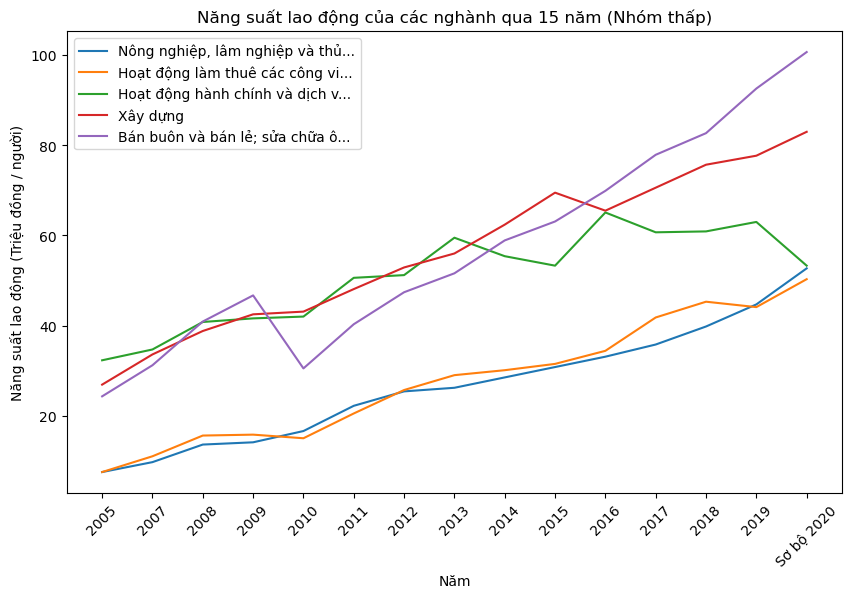

In [278]:
thap = total[:5].keys()
y_axis = data_by_industry[thap].values.T

title = 'Năng suất lao động của các nghành qua 15 năm (Nhóm thấp)'
draw_line_chart(x_axis, y_axis,title, xlabel, ylabel, thap)

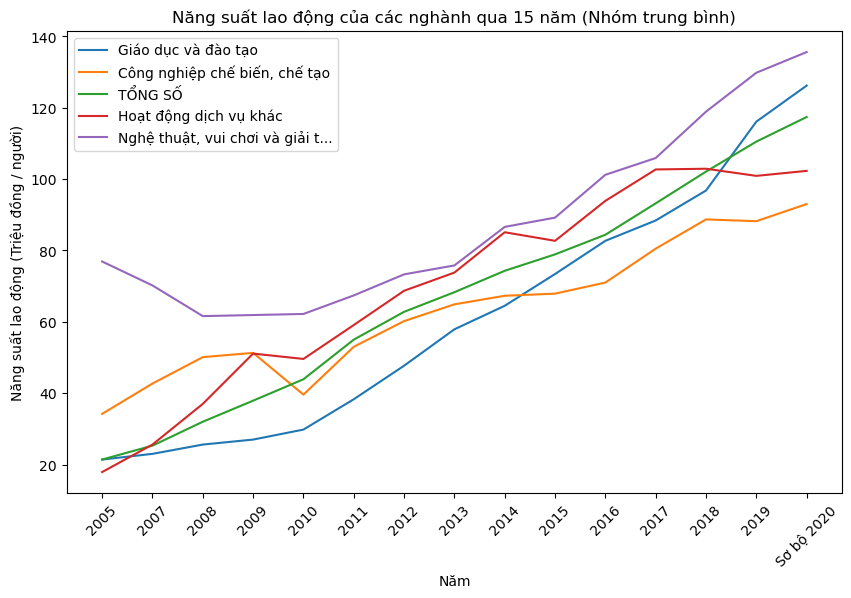

In [281]:
trung_binh = total[8:13].keys()
y_axis = data_by_industry[trung_binh].values.T

title = 'Năng suất lao động của các nghành qua 15 năm (Nhóm trung bình)'
draw_line_chart(x_axis, y_axis,title, xlabel, ylabel, trung_binh)

**Nhận xét:**
- Mặc dù cũng có một số nghành có một số năm năng suất lao động có giảm, nhưng nhìn chung ngoại trừ nghành bất động sản có năng suất lao động biến đổi thất thường thì các nghành còn lại đều tăng rất nhiều trong 15 năm. Trung bình tăng khoảng 5 đến 7 lần (là do đời sống tiến bộ hay lạm phát hay hay cả 2?)
- Sự chênh lệch rất lớn giữa nhóm nghành có năng suất lao động cực cao :1-2 tỷ / người so với 60-70tr người. (Do nghành ít người, hay toàn chức vị cao?)
- Đường TỔNG SỐ thể hiện năng suất lao động trung bình cho thấy năng suất lao động tăng rất ổn định.